AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [2]:
import pandas as pd
from io import StringIO

# Load the Titanic dataset
file_path = 'C:\\Users\\13934\\Github\\NonGradedEX5\\titanic.csv'
df = pd.read_csv(file_path)

# Get the first 10 rows
first_10_rows = df.head(10)

# Get the last 20 rows
last_20_rows = df.tail(20)

# Get dataset information
info_buf = StringIO()
df.info(buf=info_buf)
info = info_buf.getvalue()

# Describe the dataset
description = df.describe()

# Print all the results
print("First 10 Rows:\n", first_10_rows.to_string(index=False), "\n")
print("Last 20 Rows:\n", last_20_rows.to_string(index=False), "\n")
print("Dataset Information:\n", info, "\n")
print("Dataset Description:\n", description.to_string(), "\n")


First 10 Rows:
  PassengerId Survived  Pclass                                                Name    Sex  Age  SibSp  Parch           Ticket    Fare Cabin Embarked
           1        0       3                             Braund, Mr. Owen Harris   male 22.0      1      0        A/5 21171    7.25   NaN        S
           2        1       1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0      1      0         PC 17599 71.2833   C85        C
           3        1       3                              Heikkinen, Miss. Laina female 26.0      0      0 STON/O2. 3101282   7.925   NaN        S
           4        1       1        Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0      1      0           113803    53.1  C123        S
           5        0       3                            Allen, Mr. William Henry   male 35.0      0      0           373450    8.05   NaN        S
           6        0       3                                    Moran, Mr. James   male  NaN   

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values in the dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


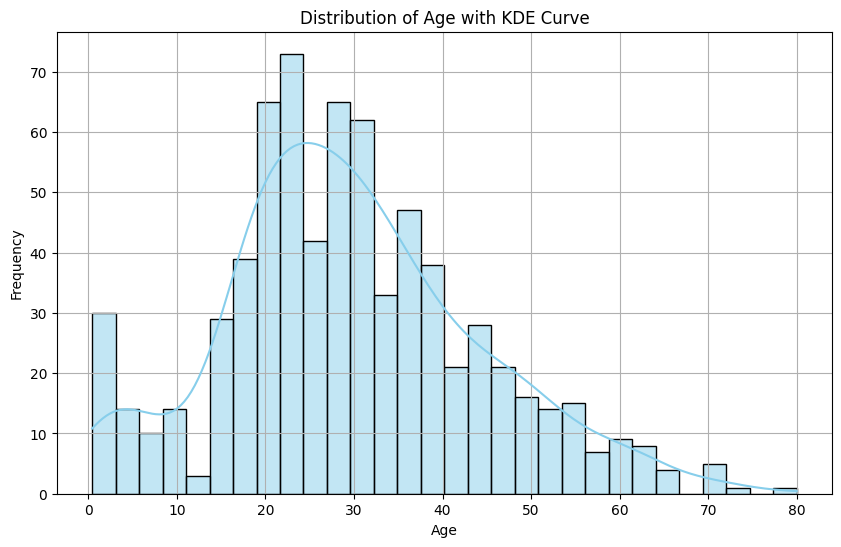

The median of the 'Age' column is: 28.0
Unique values in 'Fare': ['7.25' '71.2833' '7.925' '53.1' '8.05' '8.4583' '51.8625' '21.075'
 '11.1333' '30.0708' '16.7' '26.55' '31.275' '7.8542' '16' '29.125' '13'
 '18' '7.225' '26' '8.0292' '35.5' '31.3875' '263' '7.8792' '7.8958'
 '27.7208' '146.5208' '7.75' '10.5' '82.1708' '52' '7.2292' '11.2417'
 '9.475' '21' '41.5792' '15.5' '21.6792' '17.8' '39.6875' '7.8' '76.7292'
 '61.9792' '27.75' '46.9' '80' '83.475' '27.9' '$27.7208' '15.2458'
 '8.1583' '8.6625' '73.5' '14.4542' '56.4958' '7.65' '29' '12.475' '9'
 '9.5' '7.7875' '47.1' '15.85' '34.375' '61.175' '20.575' '34.6542'
 '63.3583' '23' '77.2875' '8.6542' '7.775' '24.15' '9.825' '14.4583'
 '247.5208' '$7.75' '7.1417' '22.3583' '6.975' '7.05' '14.5' '15.0458'
 '26.2833' '9.2167' '79.2' '6.75' '11.5' '36.75' '7.7958' '12.525' '66.6'
 '7.3125' '61.3792' '7.7333' '69.55' '16.1' '15.75' '20.525' '55' '25.925'
 '33.5' '30.6958' '25.4667' '28.7125' '0' '15.05' '$39' '22.025' '50'
 '8.4042' '6.49

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\256367455.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace=True)
C:\Users\13934\AppData\Local\Temp\ipykernel_9444\256367455.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Added seaborn for the KDE curve

# Load the Titanic dataset
file_path = 'C:\\Users\\13934\\Github\\NonGradedEX5\\titanic.csv'
df = pd.read_csv(file_path)

# 1. Find out how many missing values there are in the dataset
missing_values = df.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

# 2.1. Plot the 'Age' distribution with both a histogram and KDE curve
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black')  # Added KDE

# Set plot titles and labels
plt.title('Distribution of Age with KDE Curve')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2.2. Central tendency calculation for 'Age' - Use the median to avoid the influence of outliers
age_median = df['Age'].median()
print(f"The median of the 'Age' column is: {age_median}")

# 2.3. Fill missing values in 'Age' column with the median
df['Age'].fillna(age_median, inplace=True)

# 3. Handling missing values in 'Cabin'
df['Cabin_known'] = df['Cabin'].notnull()

# 4. Handling missing values in 'Embarked'
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

# 5. Handling incorrect data in 'Survived'
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce').fillna(0)

# 6. Handling incorrectly formatted data in 'Fare'
# Inspecting unique values in the 'Fare' column
print("Unique values in 'Fare':", df['Fare'].unique())

# Convert the 'Fare' column to numeric and coerce any incorrect values
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Fill missing values in 'Fare' with the median
fare_median = df['Fare'].median()
df['Fare'].fillna(fare_median, inplace=True)

# Output the final dataset with changes
print("First 10 rows of the cleaned dataset:\n", df.head(10))

# Checking again for any remaining missing values
remaining_missing_values = df.isnull().sum()
print("Remaining missing values in the dataset:\n", remaining_missing_values)


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average fare grouped by Pclass:
 Pclass
1    84.662872
2    20.561977
3    13.685594
Name: Fare, dtype: float64


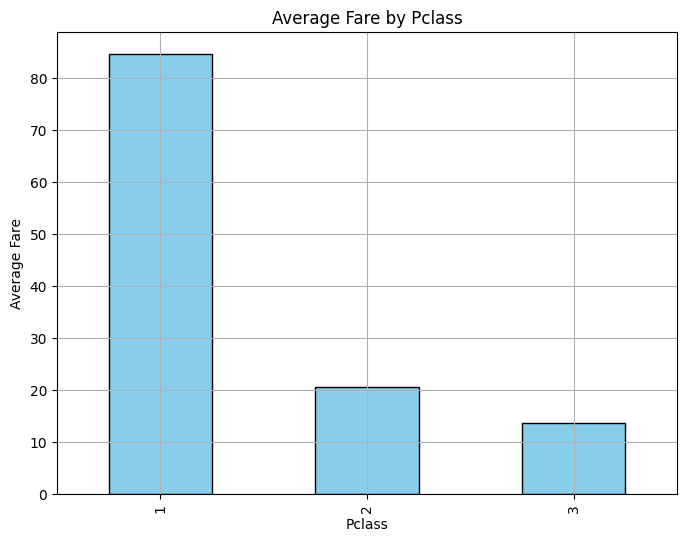

Average fare grouped by Sex:
 Sex
female    44.456972
male      25.531518
Name: Fare, dtype: float64


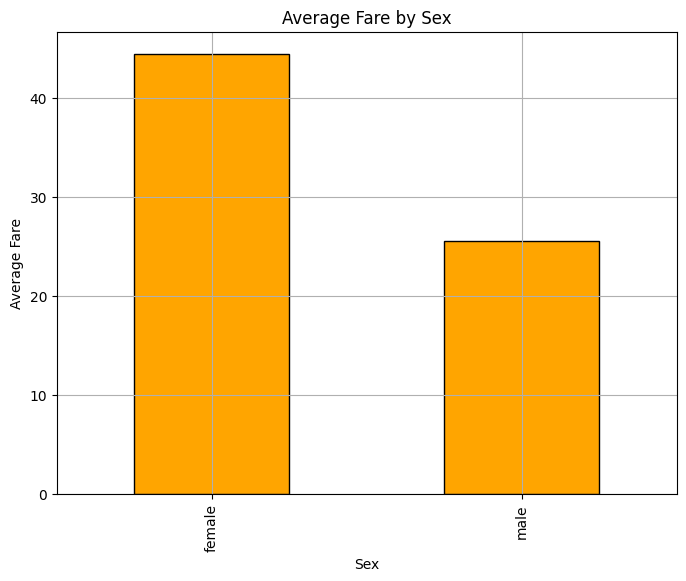

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = 'C:\\Users\\13934\\Github\\NonGradedEX5\\titanic.csv'
df = pd.read_csv(file_path)

# Convert 'Fare' to numeric in case of any formatting issues
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# AIM #3: Grouping

# 1. Find out the average fare grouped by Pclass
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("Average fare grouped by Pclass:\n", average_fare_by_pclass)

# 1.1. Plot the above using a bar plot
plt.figure(figsize=(8, 6))
average_fare_by_pclass.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.grid(True)
plt.show()

# 2. Find out the average fare grouped by Sex
average_fare_by_sex = df.groupby('Sex')['Fare'].mean()
print("Average fare grouped by Sex:\n", average_fare_by_sex)

# 2.1. Plot the above using a bar plot
plt.figure(figsize=(8, 6))
average_fare_by_sex.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.grid(True)
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

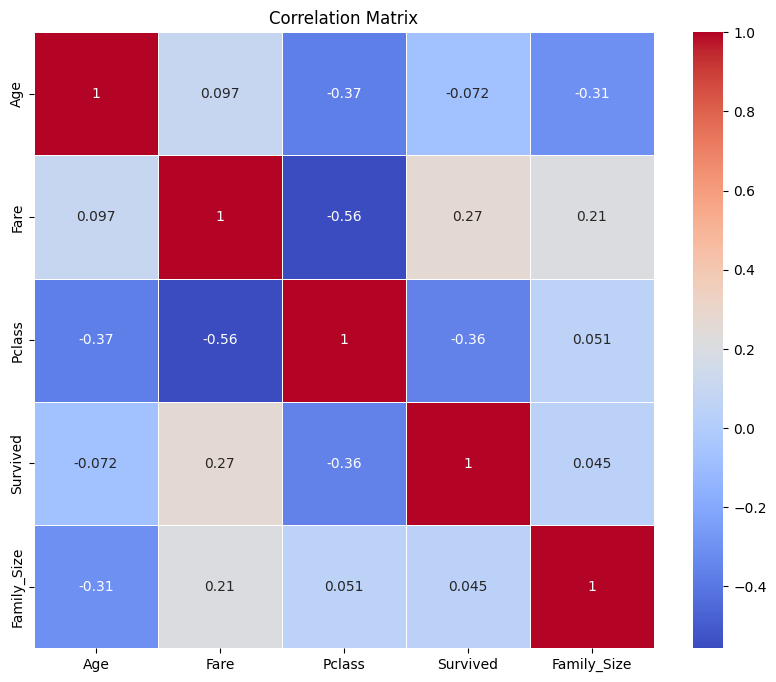

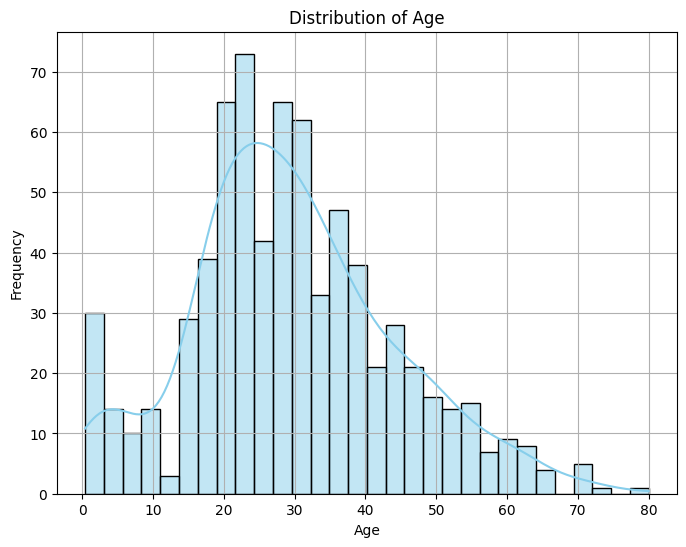

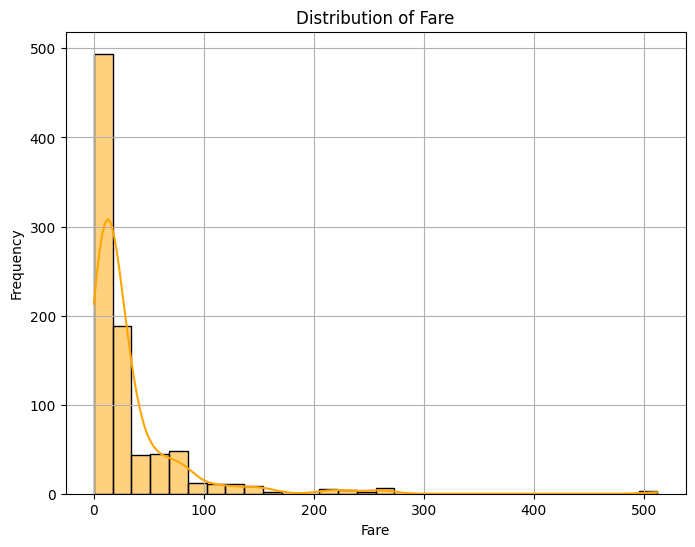

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\886212157.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set2')


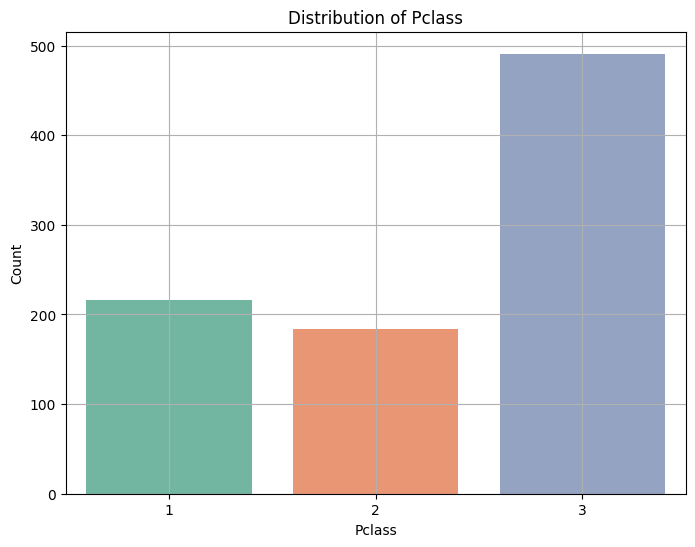

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\886212157.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set1')


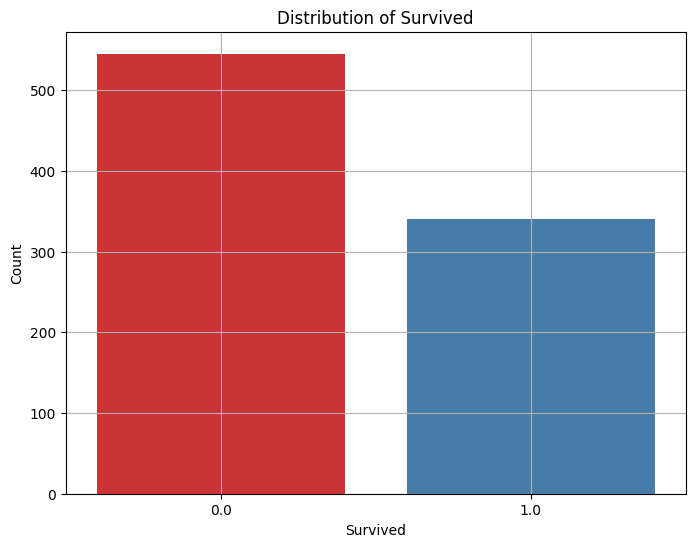

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\886212157.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='Set3')


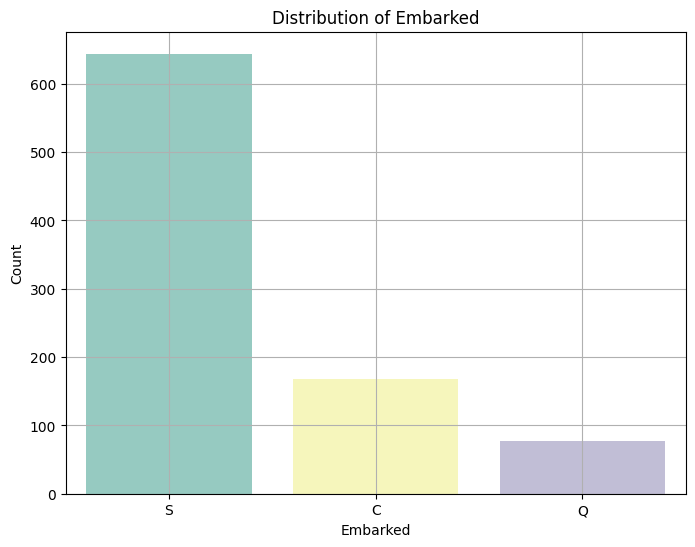

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\886212157.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='Set1')


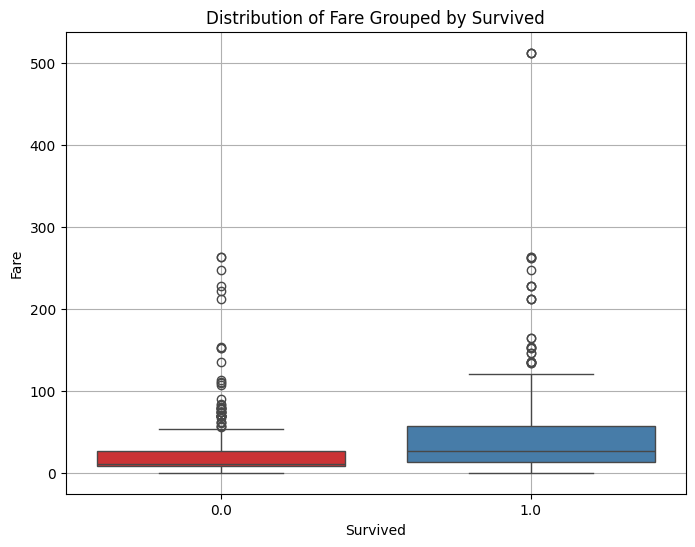

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\886212157.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')


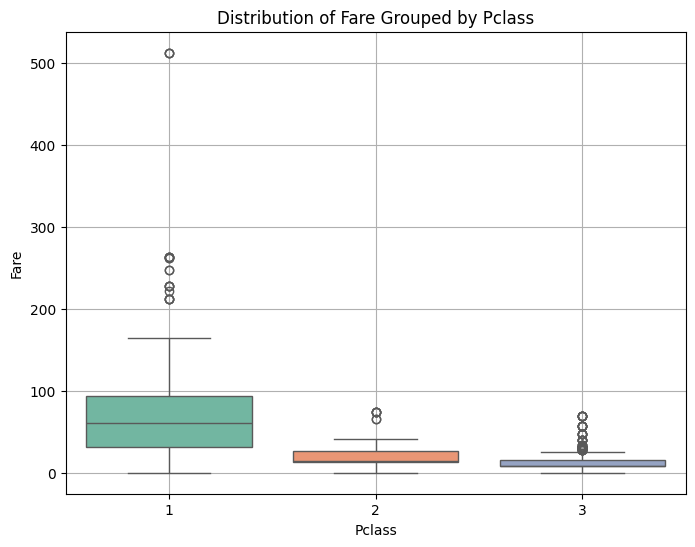

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\886212157.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set1')


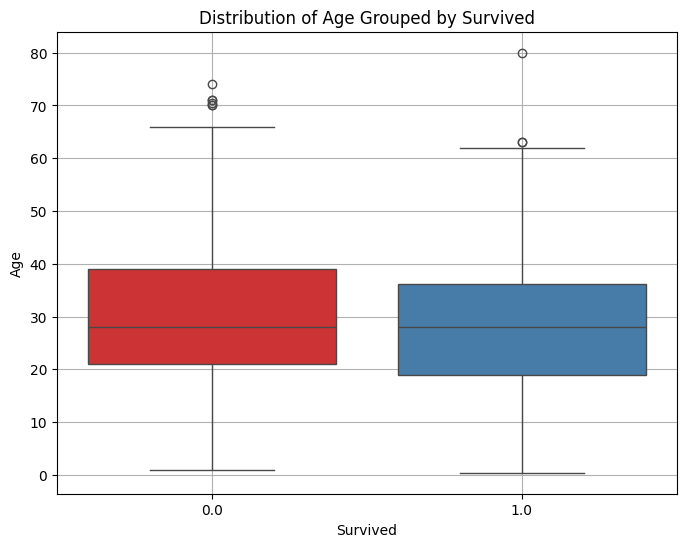

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\886212157.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')


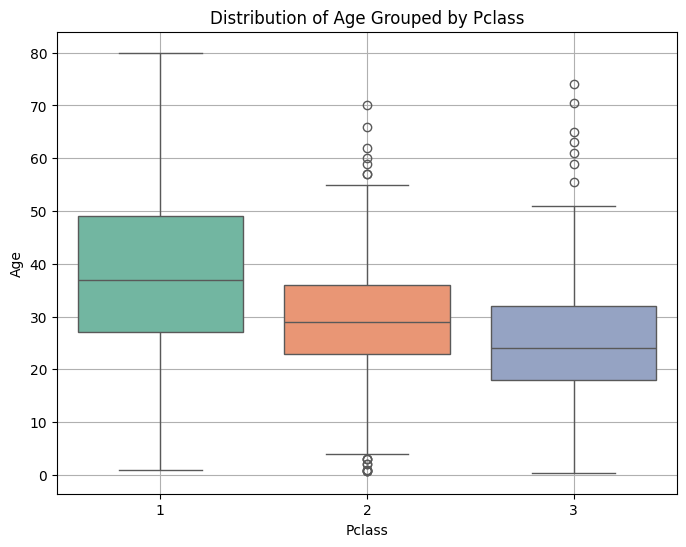

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\886212157.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Family_Size', data=df, palette='Set1')


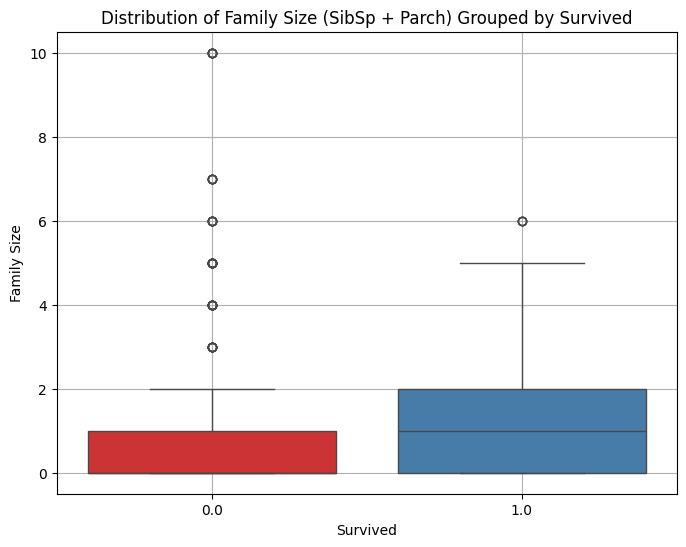

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\886212157.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Family_Size', data=df, palette='Set2')


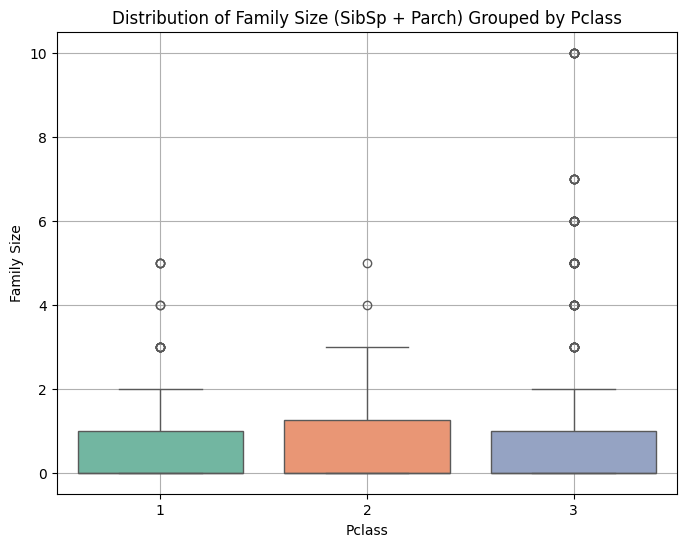

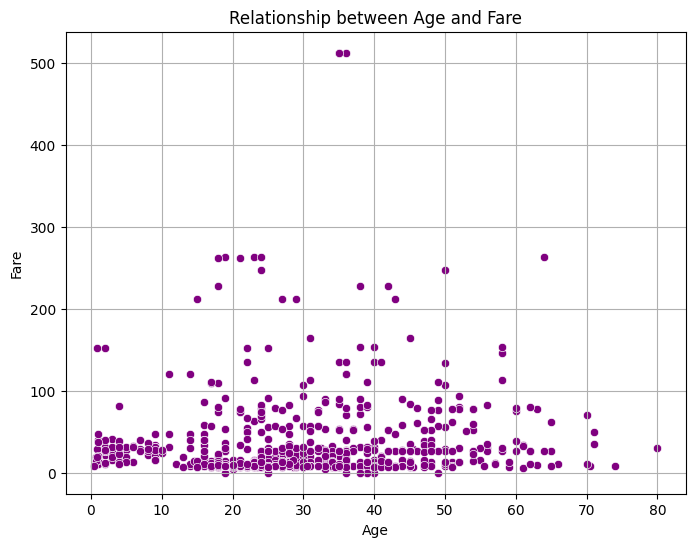

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = 'C:\\Users\\13934\\Github\\NonGradedEX5\\titanic.csv'
df = pd.read_csv(file_path)

# Convert 'Age', 'Fare', 'Pclass', 'Survived' to numeric, and coerce any errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

# Combine 'SibSp' and 'Parch' to create a 'Family_Size' column
df['Family_Size'] = df['SibSp'] + df['Parch']

# Handle any invalid entries like 'Zero' by converting them to NaN
df.replace('Zero', pd.NA, inplace=True)

# Drop any rows with NaN values in the relevant columns before calculating the correlation matrix
df_cleaned = df[['Age', 'Fare', 'Pclass', 'Survived', 'Family_Size']].dropna()

# 13. Plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# To ensure correctness for other parts of AIM #4
# 1. Plot the distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Plot the distribution of 'Fare'
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Plot the distribution of 'Pclass'
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 4. Plot the distribution of 'Survived'
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 5. Plot the distribution of 'Embarked'
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df, palette='Set3')
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 6. Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set1')
plt.title('Distribution of Fare Grouped by Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# 7. Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Distribution of Fare Grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# 8. Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set1')
plt.title('Distribution of Age Grouped by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# 9. Plot the distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')
plt.title('Distribution of Age Grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# 10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Family_Size', data=df, palette='Set1')
plt.title('Distribution of Family Size (SibSp + Parch) Grouped by Survived')
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.grid(True)
plt.show()

# 11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Family_Size', data=df, palette='Set2')
plt.title('Distribution of Family Size (SibSp + Parch) Grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Family Size')
plt.grid(True)
plt.show()

# 12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=df, color='purple')
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()



AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

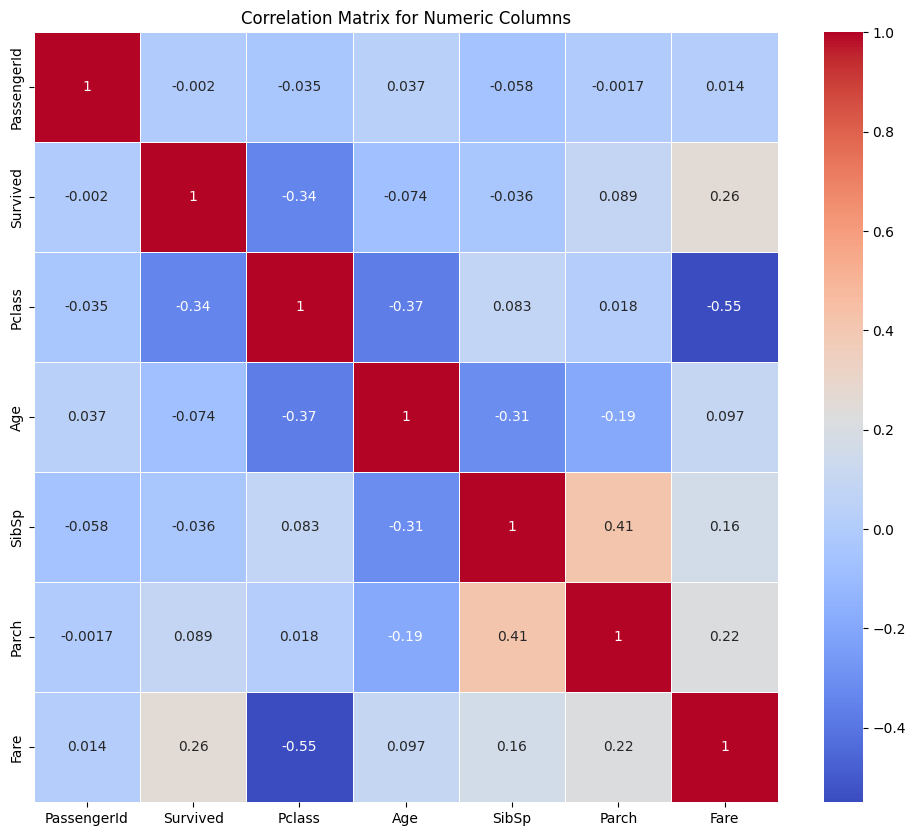

Correlation between Age and Fare: 0.09651129963357943


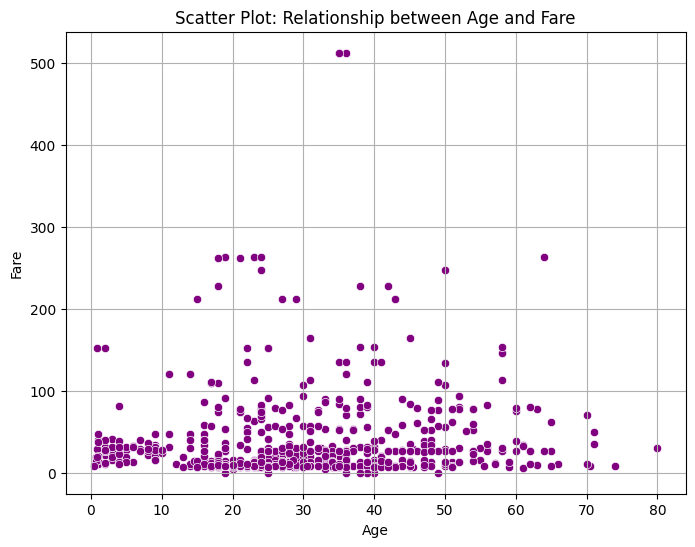

Correlation between Pclass and Fare: -0.5501220003469639
Correlation between Survived and Fare: 0.2554316891349917


C:\Users\13934\AppData\Local\Temp\ipykernel_9444\805847357.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')


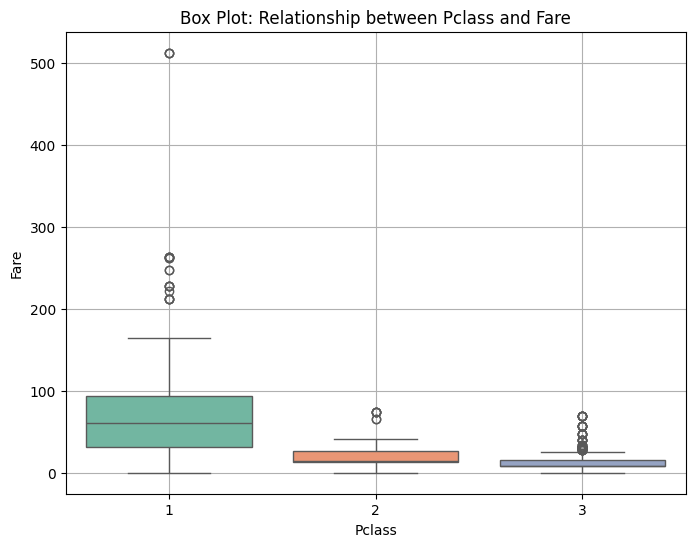

C:\Users\13934\AppData\Local\Temp\ipykernel_9444\805847357.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='Set1')


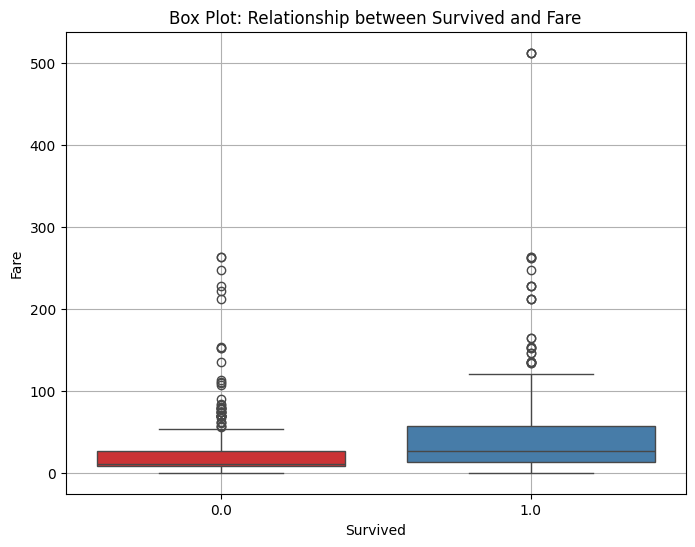

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = 'C:\\Users\\13934\\Github\\NonGradedEX5\\titanic.csv'  # Adjust the file path accordingly
df = pd.read_csv(file_path)

# Convert necessary columns to numeric and coerce errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')
df['SibSp'] = pd.to_numeric(df['SibSp'], errors='coerce')
df['Parch'] = pd.to_numeric(df['Parch'], errors='coerce')

# 1. Generate a correlation matrix for the entire dataset (numeric columns only)
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()  # Calculate correlation for numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

# 2. Find the correlation between 'Age' and 'Fare'
correlation_age_fare = df[['Age', 'Fare']].corr().iloc[0, 1]
print(f"Correlation between Age and Fare: {correlation_age_fare}")

# 2.1 Plot the relationship between 'Age' and 'Fare'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=df, color='purple')
plt.title('Scatter Plot: Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# 3. Explore other possible correlations in the dataset
# Example: Correlation between 'Pclass' and 'Fare', and 'Survived' and 'Fare'.

# Correlation between 'Pclass' and 'Fare'
correlation_pclass_fare = df[['Pclass', 'Fare']].corr().iloc[0, 1]
print(f"Correlation between Pclass and Fare: {correlation_pclass_fare}")

# Correlation between 'Survived' and 'Fare'
correlation_survived_fare = df[['Survived', 'Fare']].corr().iloc[0, 1]
print(f"Correlation between Survived and Fare: {correlation_survived_fare}")

# Additional scatter plot for 'Pclass' vs 'Fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Box Plot: Relationship between Pclass and Fare')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# Scatter plot for 'Survived' vs 'Fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set1')
plt.title('Box Plot: Relationship between Survived and Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.grid(True)
plt.show()


